A model for predicting fraudulent transactions for a financial company. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("Transaction.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
#shape of the dataset
df.shape

(6362620, 11)

In [7]:
#information about the columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
#checking for any duplicate data
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [10]:
#checking for any null or misssing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
#information regarding numerical columns
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


From df.describe() we can conclude that isFraud and isFlaggedFraud doesn't have any outliers beacause min = 0(False) and max = 1(True).

step


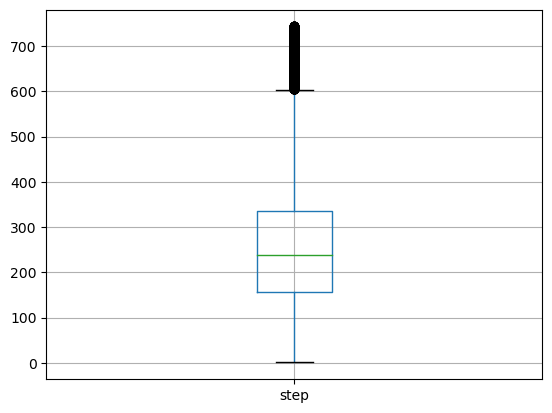

amount


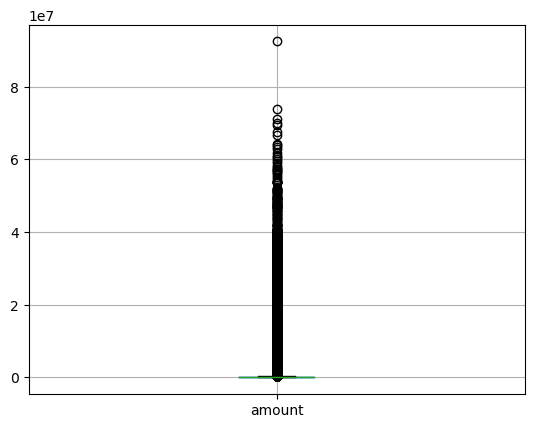

oldbalanceOrg


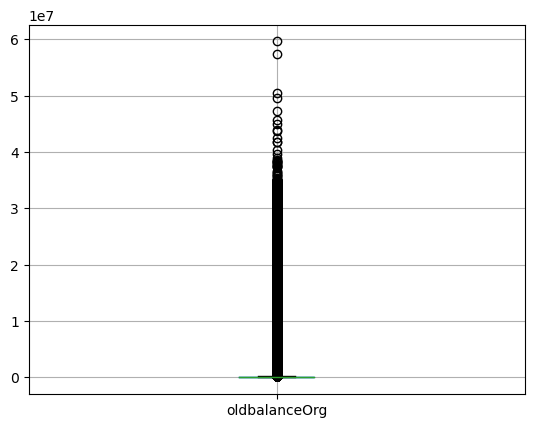

newbalanceOrig


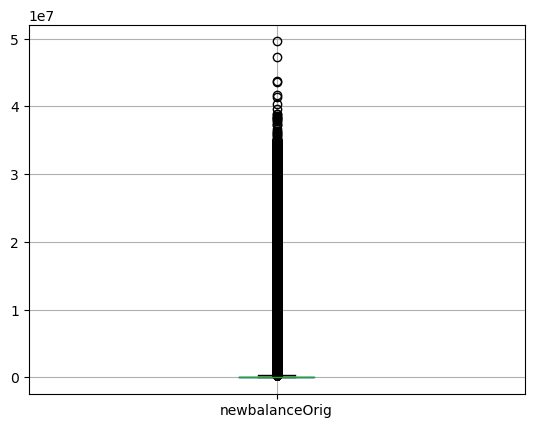

oldbalanceDest


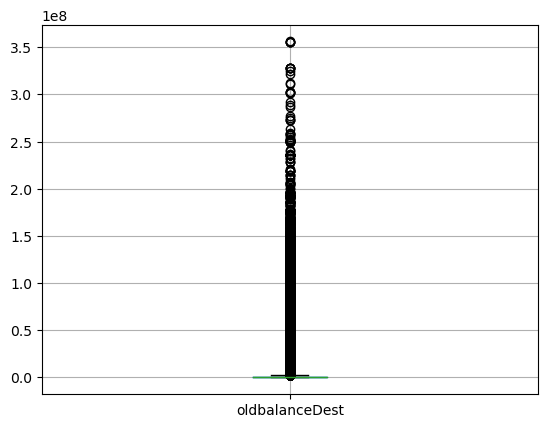

newbalanceDest


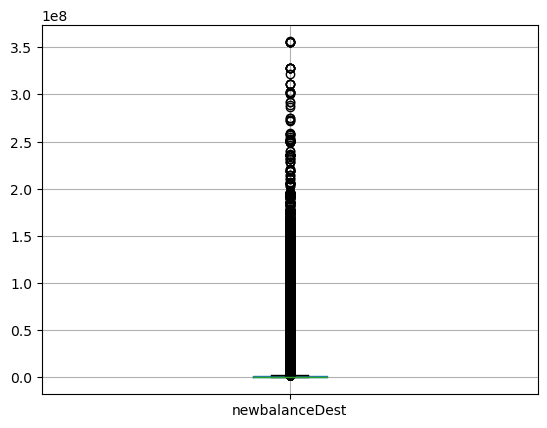

isFraud


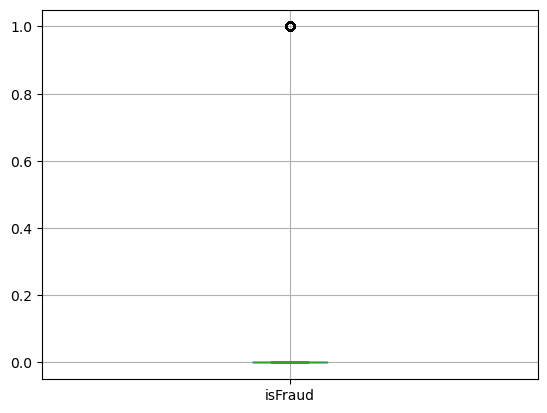

isFlaggedFraud


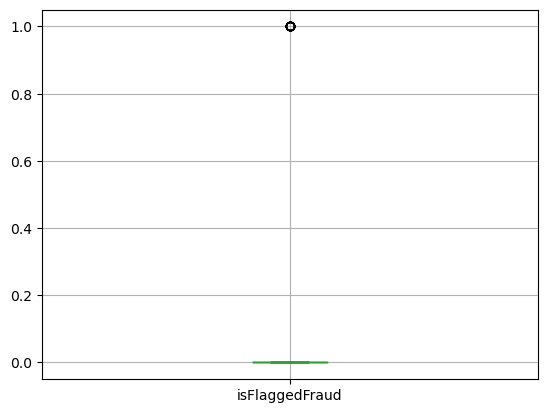

In [12]:
#checking for outliers using box plot
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        print(col)
        df.boxplot(column = col)
        plt.show()
    else:
        pass

From the above boxplots we can say the step column have some outliers and can't conclude much about other columns.

In [13]:
#checking for outliers
numerical_columns = ['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Initialize a dictionary to store the number of outliers for each column
outliers_count = {}

for col in numerical_columns:
    # Calculate the IQR for each numerical column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identify potential outliers using the IQR method
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) |
                (df[col] > (Q3 + 1.5 * IQR)))
    
    # Count the number of outliers for the current column
    num_outliers = outliers.sum()
    
    # Store the count in the dictionary
    outliers_count[col] = num_outliers

# Display the number of outliers for each column
for col, count in outliers_count.items():
    print(f"Number of outliers in column '{col}': {count}")

Number of outliers in column 'step': 102688
Number of outliers in column 'amount': 338078
Number of outliers in column 'oldbalanceOrg': 1112507
Number of outliers in column 'newbalanceOrig': 1053391
Number of outliers in column 'oldbalanceDest': 786135
Number of outliers in column 'newbalanceDest': 738527


I believe the reasons for these columns having outliers are legitimate and keeping them as it may provide any hidden patterns.

0    6354407
1       8213
Name: isFraud, dtype: int64

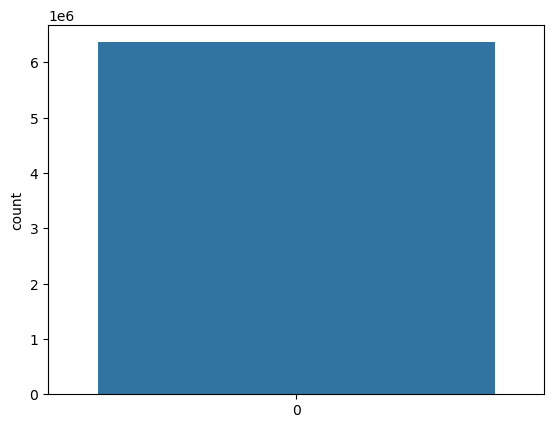

In [14]:
sns.countplot(df["isFraud"])
df.isFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

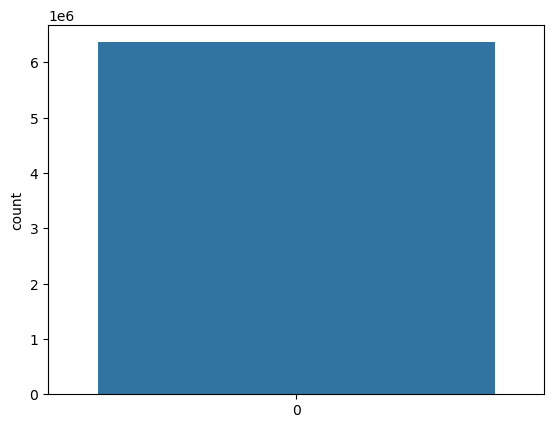

In [15]:
sns.countplot(df["isFlaggedFraud"])
df.isFlaggedFraud.value_counts()

In [16]:
#checking for multicollinearity
df.corr()

C:\Users\Arun\AppData\Local\Temp\ipykernel_17340\839038389.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


C:\Users\Arun\AppData\Local\Temp\ipykernel_17340\3685784014.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


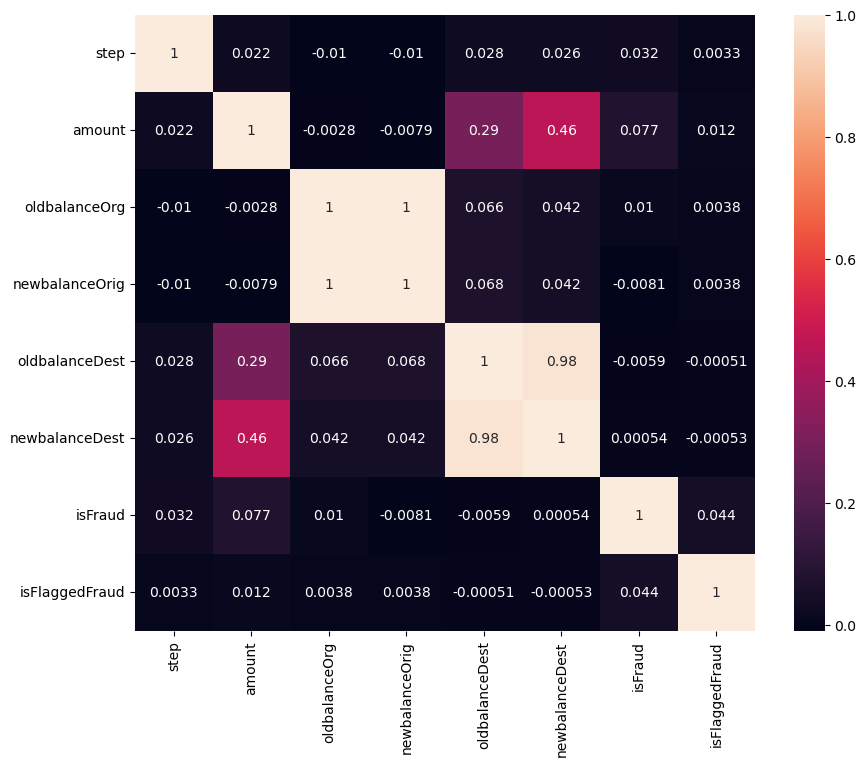

In [17]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

We can see from the above heatmap that oldbalanceOrig and newbalanceOrig have collinearity of 1 we can't define the individual effects of these columns for the model and redundancy of having two columns with same information may lead to overfitting. So, adding a new feature called balance which is the difference between oldbalanceOrig and newbalanceOrig will help.
Same with oldbalanceDest and newbalanceDest.

In [18]:
# Create new columns for balance changes
df['balanceChangeOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Drop the original balance columns
df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)

C:\Users\Arun\AppData\Local\Temp\ipykernel_17340\3685784014.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


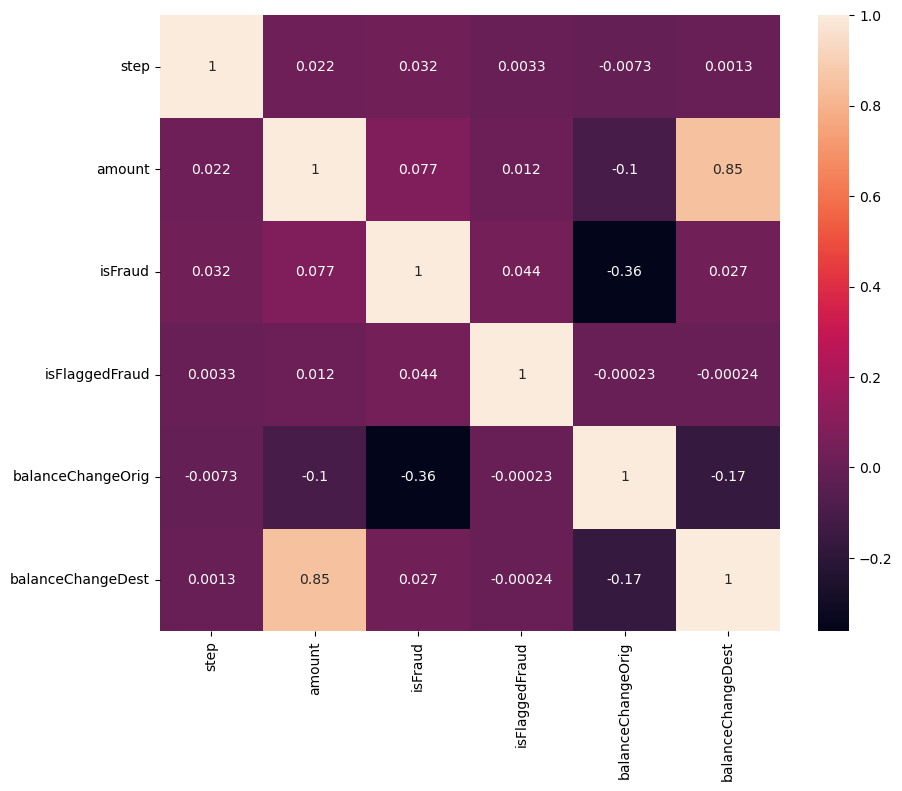

In [19]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [20]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [21]:
#Data encoding converting categorical columns to numerical
encoded_types = pd.get_dummies(df['type'], prefix='type')
df = pd.concat([df, encoded_types], axis=1)

# Drop the original 'type' column
df.drop(['type'], axis=1, inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['nameOrig'] = labelencoder.fit_transform(df['nameOrig'])
df['nameDest'] = labelencoder.fit_transform(df['nameDest'])

In [23]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df.drop(['isFraud'], axis=1)  # Features
y = df['isFraud']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [24]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [26]:
model.score(X_train_scaled,y_train)

0.9992485406954996

In [27]:
model.score(X_test_scaled,y_test)

0.9992730981891108

In [28]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 2)
model_dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=2)

In [29]:
model_dt.score(X_test_scaled,y_test)

0.9994059051145597

In [30]:
feature_importances = model_dt.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)


              Feature  Importance
5   balanceChangeOrig    0.385084
6   balanceChangeDest    0.234515
0                step    0.133094
11      type_TRANSFER    0.078275
2            nameOrig    0.050206
3            nameDest    0.048341
1              amount    0.040827
8       type_CASH_OUT    0.027687
4      isFlaggedFraud    0.001815
10       type_PAYMENT    0.000155
7        type_CASH_IN    0.000000
9          type_DEBIT    0.000000
